In [1]:
# import spark sql
from pyspark.sql import SparkSession
# create spark session with 8 threads
spark = SparkSession.builder.appName('test').master('local[16]').getOrCreate()

In [2]:
spark

In [3]:
# create a dataframe loading a csv file
# headers = ['']
df = spark.read.csv('advertising.csv', header=True,inferSchema=True)

# show the dataframe
df.show()

+------------------------+---+-----------+--------------------+--------------------+-----------------+----+--------------------+-------------------+-------------+
|Daily Time Spent on Site|Age|Area Income|Daily Internet Usage|       Ad Topic Line|             City|Male|             Country|          Timestamp|Clicked on Ad|
+------------------------+---+-----------+--------------------+--------------------+-----------------+----+--------------------+-------------------+-------------+
|                   68.95| 35|    61833.9|              256.09|Cloned 5thgenerat...|      Wrightburgh|   0|             Tunisia|2016-03-27 00:53:11|            0|
|                   80.23| 31|   68441.85|              193.77|Monitored nationa...|        West Jodi|   1|               Nauru|2016-04-04 01:39:02|            0|
|                   69.47| 26|   59785.94|               236.5|Organic bottom-li...|         Davidton|   0|          San Marino|2016-03-13 20:35:42|            0|
|                   74

In [7]:
# make header lowercase and replace spaces with underscores
df = df.toDF(*[c.lower().replace(' ', '_') for c in df.columns])

# show the dataframe
df.show()

+------------------------+---+-----------+--------------------+--------------------+-----------------+----+--------------------+-------------------+-------------+
|daily_time_spent_on_site|age|area_income|daily_internet_usage|       ad_topic_line|             city|male|             country|          timestamp|clicked_on_ad|
+------------------------+---+-----------+--------------------+--------------------+-----------------+----+--------------------+-------------------+-------------+
|                   68.95| 35|    61833.9|              256.09|Cloned 5thgenerat...|      Wrightburgh|   0|             Tunisia|2016-03-27 00:53:11|            0|
|                   80.23| 31|   68441.85|              193.77|Monitored nationa...|        West Jodi|   1|               Nauru|2016-04-04 01:39:02|            0|
|                   69.47| 26|   59785.94|               236.5|Organic bottom-li...|         Davidton|   0|          San Marino|2016-03-13 20:35:42|            0|
|                   74

In [8]:
# sum of clicked_on_ad
df.groupBy('clicked_on_ad').sum().show()

+-------------+-----------------------------+--------+--------------------+-------------------------+---------+------------------+
|clicked_on_ad|sum(daily_time_spent_on_site)|sum(age)|    sum(area_income)|sum(daily_internet_usage)|sum(male)|sum(clicked_on_ad)|
+-------------+-----------------------------+--------+--------------------+-------------------------+---------+------------------+
|            1|            26572.88999999998|   20167|2.4307206869999997E7|        72743.23000000003|      231|               500|
|            0|            38427.30999999999|   15842|3.0692793209999986E7|        107256.8699999999|      250|                 0|
+-------------+-----------------------------+--------+--------------------+-------------------------+---------+------------------+



In [9]:
# sum of clicked_on_ad if row is male
df.filter(df['male'] == 1).groupBy('clicked_on_ad').sum().show()

+-------------+-----------------------------+--------+--------------------+-------------------------+---------+------------------+
|clicked_on_ad|sum(daily_time_spent_on_site)|sum(age)|    sum(area_income)|sum(daily_internet_usage)|sum(male)|sum(clicked_on_ad)|
+-------------+-----------------------------+--------+--------------------+-------------------------+---------+------------------+
|            1|           11937.779999999995|    9387|1.1340014809999993E7|        33593.19000000001|      231|               231|
|            0|           19177.280000000002|    7841|1.5123843870000012E7|        53601.00999999999|      250|                 0|
+-------------+-----------------------------+--------+--------------------+-------------------------+---------+------------------+



In [10]:
# sum of clicked_on_ad if row is not male
df.filter(df['male'] == 0).groupBy('clicked_on_ad').sum().show()

+-------------+-----------------------------+--------+--------------------+-------------------------+---------+------------------+
|clicked_on_ad|sum(daily_time_spent_on_site)|sum(age)|    sum(area_income)|sum(daily_internet_usage)|sum(male)|sum(clicked_on_ad)|
+-------------+-----------------------------+--------+--------------------+-------------------------+---------+------------------+
|            1|           14635.110000000004|   10780|1.2967192060000004E7|        39150.04000000002|        0|               269|
|            0|           19250.029999999995|    8001|1.5568949340000002E7|       53655.860000000015|        0|                 0|
+-------------+-----------------------------+--------+--------------------+-------------------------+---------+------------------+



In [11]:
#  From which country most click on ad was received.
df.groupBy('country').sum().orderBy('sum(clicked_on_ad)', ascending=False).show()

+--------------+-----------------------------+--------+------------------+-------------------------+---------+------------------+
|       country|sum(daily_time_spent_on_site)|sum(age)|  sum(area_income)|sum(daily_internet_usage)|sum(male)|sum(clicked_on_ad)|
+--------------+-----------------------------+--------+------------------+-------------------------+---------+------------------+
|     Australia|                       502.69|     342|         364439.38|                  1229.71|        2|                 7|
|      Ethiopia|                       332.41|     261|         351501.09|        929.4899999999999|        5|                 7|
|        Turkey|           460.70000000000005|     328| 431663.7700000001|                  1192.38|        5|                 7|
| Liechtenstein|                       342.83|     230|         303120.24|                   863.37|        3|                 6|
|  South Africa|                        476.7|     324|462093.75999999995|                

In [12]:
# From which city most click on ad was received.
df.groupBy('city').sum().orderBy('sum(clicked_on_ad)', ascending=False).show()

+----------------+-----------------------------+--------+------------------+-------------------------+---------+------------------+
|            city|sum(daily_time_spent_on_site)|sum(age)|  sum(area_income)|sum(daily_internet_usage)|sum(male)|sum(clicked_on_ad)|
+----------------+-----------------------------+--------+------------------+-------------------------+---------+------------------+
|       Lisamouth|                       161.06|     124|         170851.82|                    491.3|        2|                 2|
|      Millerbury|                       106.11|      64|         135167.59|       300.84000000000003|        1|                 2|
|    Michelleside|                        130.8|      84|         127547.51|                   361.23|        1|                 2|
|      Lake David|                       114.69|      67|          99805.53|                   258.18|        1|                 2|
|     West Amanda|                        95.63|      77|         108332.85|

In [13]:
# Considering the 24 hours day as day (6 AM - 6 PM) and night (6 PM - 6 AM), the ad was mostly clicked during the day time or night time. Use the timestamp column to answer this question.
df.groupBy('timestamp').sum().orderBy('sum(clicked_on_ad)', ascending=False).show()

+-------------------+-----------------------------+--------+----------------+-------------------------+---------+------------------+
|          timestamp|sum(daily_time_spent_on_site)|sum(age)|sum(area_income)|sum(daily_internet_usage)|sum(male)|sum(clicked_on_ad)|
+-------------------+-----------------------------+--------+----------------+-------------------------+---------+------------------+
|2016-03-17 22:24:02|                        47.23|      43|        73538.09|                   210.87|        1|                 1|
|2016-03-09 03:41:30|                        63.45|      23|        52182.23|                   140.64|        1|                 1|
|2016-06-19 23:04:45|                        56.78|      28|        39939.39|                   124.32|        0|                 1|
|2016-07-03 22:13:19|                        53.14|      38|        49111.47|                    109.0|        1|                 1|
|2016-02-13 07:53:55|                         54.7|      36|        3

In [14]:
# Which (city, country) has the highest average income?
df.groupBy('city', 'country').avg().orderBy('avg(area_income)', ascending=False).show()

+-------------------+--------------------+-----------------------------+--------+----------------+-------------------------+---------+------------------+
|               city|             country|avg(daily_time_spent_on_site)|avg(age)|avg(area_income)|avg(daily_internet_usage)|avg(male)|avg(clicked_on_ad)|
+-------------------+--------------------+-----------------------------+--------+----------------+-------------------------+---------+------------------+
|        Edwardmouth|          Madagascar|                        64.51|    42.0|         79484.8|                   190.71|      1.0|               0.0|
|           Mataberg|               Palau|                         60.7|    43.0|        79332.33|                    192.6|      1.0|               0.0|
|        East Ronald|        Saint Helena|                        67.85|    41.0|        78520.99|                    202.7|      1.0|               1.0|
|  Port Whitneyhaven|             Belgium|                        68.88|    

In [15]:
# Which age group has the highest daily internet usage?
df.groupBy('age').avg().orderBy('avg(daily_internet_usage)', ascending=False).show()

+---+-----------------------------+--------+------------------+-------------------------+-------------------+-------------------+
|age|avg(daily_time_spent_on_site)|avg(age)|  avg(area_income)|avg(daily_internet_usage)|          avg(male)| avg(clicked_on_ad)|
+---+-----------------------------+--------+------------------+-------------------------+-------------------+-------------------+
| 21|                        68.46|    21.0| 50764.57166666666|                  208.235| 0.6666666666666666|                0.0|
| 31|            71.06533333333333|    31.0|58466.672833333345|        204.2541666666666|0.48333333333333334|0.23333333333333334|
| 25|            71.36074074074074|    25.0| 55830.65592592593|       202.02851851851852| 0.6666666666666666|0.14814814814814814|
| 28|            69.78354166666666|    28.0|58357.932291666664|       200.97854166666664|             0.4375| 0.2708333333333333|
| 26|                        69.43|    26.0|57440.580540540526|         199.007027027027| 

In [16]:
#  Could you create a model for predicting ad click? Create a training data and test data. Present what is your prediction error.
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# create a vector assembler
assembler = VectorAssembler(inputCols=['daily_time_spent_on_site', 'age', 'area_income', 'daily_internet_usage'], outputCol='features')


In [17]:
# transform the dataframe
output = assembler.transform(df)

# create a logistic regression model
lr = LogisticRegression(labelCol='clicked_on_ad')

# fit the model
lrModel = lr.fit(output)

# create a summary
trainingSummary = lrModel.summary

# show the area under the curve
trainingSummary.areaUnderROC

0.9920519999999975

In [18]:
trainingSummary.roc.show()

+---+-----+
|FPR|  TPR|
+---+-----+
|0.0|  0.0|
|0.0|0.002|
|0.0|0.004|
|0.0|0.006|
|0.0|0.008|
|0.0| 0.01|
|0.0|0.012|
|0.0|0.014|
|0.0|0.016|
|0.0|0.018|
|0.0| 0.02|
|0.0|0.022|
|0.0|0.024|
|0.0|0.026|
|0.0|0.028|
|0.0| 0.03|
|0.0|0.032|
|0.0|0.034|
|0.0|0.036|
|0.0|0.038|
+---+-----+
only showing top 20 rows



In [21]:
# create a binary classification evaluator
evaluator = BinaryClassificationEvaluator(rawPredictionCol='rawPrediction', labelCol='clicked_on_ad')

# create a dataframe with the predictions
predictions = lrModel.transform(output)

# show the predictions
predictions.show()

+------------------------+---+-----------+--------------------+--------------------+-----------------+----+--------------------+-------------------+-------------+--------------------+--------------------+--------------------+----------+
|daily_time_spent_on_site|age|area_income|daily_internet_usage|       ad_topic_line|             city|male|             country|          timestamp|clicked_on_ad|            features|       rawPrediction|         probability|prediction|
+------------------------+---+-----------+--------------------+--------------------+-----------------+----+--------------------+-------------------+-------------+--------------------+--------------------+--------------------+----------+
|                   68.95| 35|    61833.9|              256.09|Cloned 5thgenerat...|      Wrightburgh|   0|             Tunisia|2016-03-27 00:53:11|            0|[68.95,35.0,61833...|[4.86158114283578...|[0.99232118157969...|       0.0|
|                   80.23| 31|   68441.85|          

In [22]:
# show model evaluation
evaluator.evaluate(predictions)

0.9920519999999975

In [23]:
# print model evaluation
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.9920519999999975


In [26]:
# silhouette with squared euclidean distance
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.9920519999999975


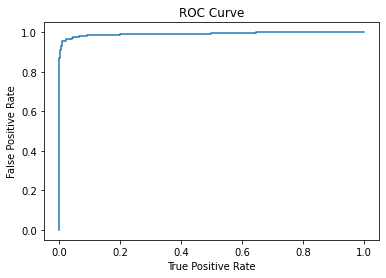

In [27]:
# graph the roc curve
import matplotlib.pyplot as plt
plt.plot(trainingSummary.roc.select('FPR').collect(), trainingSummary.roc.select('TPR').collect())
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [28]:
# save as html with nbconvert
!jupyter nbconvert --to html test_spark.ipynb

[NbConvertApp] Converting notebook test_spark.ipynb to html
[NbConvertApp] Writing 635433 bytes to test_spark.html
